# Airplane crashes

Dataset available : [here](https://data.world/data-society/airplane-crashes)<br/>
Put it in the same directory than this script

## Setting up the environment

In [9]:
#Importing the libraries
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date, timedelta, datetime

#Importing the datas
Data = pd.read_csv('Airplane_Crashes_and_Fatalities_Since_1908.csv')

## Getting familiar with the datas

In [10]:
#Let's shuffle the dataset !
np.random.seed(42) 
#Putting rows into variable "obs" and columns into variable "feat" 
#We could have put "Data.shape[0]" for rows and "Data.shape[1]" for columns
obs, feat = Data.shape
#We see the first five lines of our dataset
Data.sample(5)

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
4793,07/30/2001,16:00,"Haines, Alaska",Air Taxi,NaN,"Shagway, AK - Return",Piper PA-32-300,N39586,32-7840168,6.0,6.0,0.0,The sightseeing plane impacted the side of a m...
5020,11/28/2004,09:55,"Montrose, Colorado",Glow Air/Air Castle - Charter,73,"Montrose, CO - South Bend, IN",Canadair CL-601-2A12 Challenger,N873G,3009,6.0,3.0,0.0,"While attempting to take off from R31, the air..."
655,06/20/1944,NaN,"Porto Alegre, Brazil",Varig,NaN,NaN,Lockheed 10C Electra,PP-VAG,1008,10.0,10.0,0.0,Crashed into a river.
1874,10/09/1963,NaN,"Near Marseilles, France",Aeronaves de Panama,NaN,"Marseilles, France - Dhah, Saudi Arabia",Douglas C-74,HP-385,13915,6.0,6.0,0.0,Crashed shortly after taking off with a cargo ...
2318,06/05/1969,07:12,"North Bend, Oregon",Eureka Aero Inc. - Air Taxi,NaN,NaN,Cessna 337C,N2665S,NaN,3.0,3.0,0.0,Collided with trees on approach. Improper IFR ...


In [11]:
print("The dataset has " + str(obs) + " lines (crashes) and " + str(feat) + " features. Features are following:")

The dataset has 5268 lines (crashes) and 13 features. Features are following:


*  **Date** (date the crash had taken place)
* **Time** (time the crash had taken place)
* **Location** 
* **Operator **
* **Flight #** 
* **Route**
* **Type**
* **Registration**
* **cn/In ** - ?
* **Aboard **  - number of people aboard
* **Fatalities ** - lethal outcome
* **Ground** - saved people
* **Summary ** - brief summary of the case

Aboard = Fatalities + Ground, but I just skipped Ground row to focus on dead passengers only.

## Data manipulation

I want to create a new row with 'Date + Time' format. I replaced all the missing values of Time with 0:00. Then I removed some wrong symbols and fixed broken values.

In [12]:
#Cleaning up
Data['Time'] = Data['Time'].replace(np.nan, '00:00') 
Data['Time'] = Data['Time'].str.replace('c: ', '')
Data['Time'] = Data['Time'].str.replace('c:', '')
Data['Time'] = Data['Time'].str.replace('c', '')
Data['Time'] = Data['Time'].str.replace('12\'20', '12:20')
Data['Time'] = Data['Time'].str.replace('18.40', '18:40')
Data['Time'] = Data['Time'].str.replace('0943', '09:43')
Data['Time'] = Data['Time'].str.replace('22\'08', '22:08')
Data['Time'] = Data['Time'].str.replace('114:20', '00:00') #Is it 11:20 or 14:20 or something else? 

Data['Time'] = Data['Date'] + ' ' + Data['Time'] #Joining two rows
def todate(x):
    return datetime.strptime(x, '%m/%d/%Y %H:%M')
Data['Time'] = Data['Time'].apply(todate) #Convert to date type
print('Date ranges from ' + str(Data.Time.min()) + ' to ' + str(Data.Time.max()))

Data.Operator = Data.Operator.str.upper() #Just to avoid duplicates like 'British Airlines' and 'BRITISH Airlines'

Date ranges from 1908-09-17 17:18:00 to 2009-06-08 00:00:00


After this manipulations we have a new Time column with *%m/%d/%Y %H:%M* format. We can see that almost 10 year of recent information is missing so we will not see the actual trend.

## Data Visualization
### Total accidents

In [13]:
Data_clean = Data.groupby(Data.Time.dt.year)[['Date']].count() #Data_clean is going to be temporary data frame
Data_clean = Data_clean.rename(columns={"Date": "Count"})

In [14]:
#Data_clean.to_csv("Airplanes_crashes_clean_dataset.csv")

In [15]:
Data_clean = pd.read_csv("Airplanes_crashes_clean_dataset.csv")

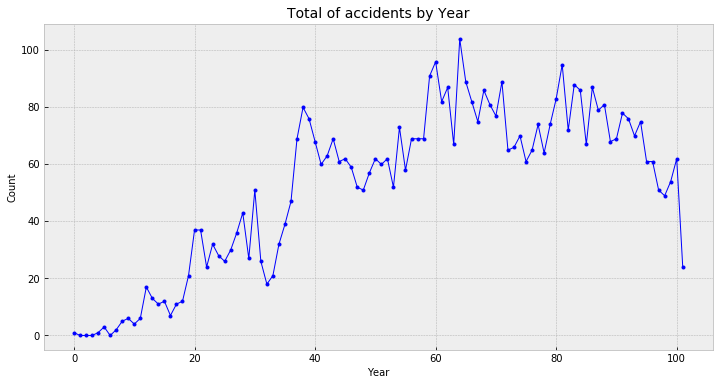

In [16]:
plt.figure(figsize=(12,6))
#Stylesheet for the figure -> I find it particularly suits scientific graphing by showing the precision of the plot.
plt.style.use('bmh')
plt.plot(Data_clean.index, 'Count', data=Data_clean, color='blue', marker = ".", linewidth=1)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.title('Total of accidents by Year', loc='Center', fontsize=14)
plt.show()

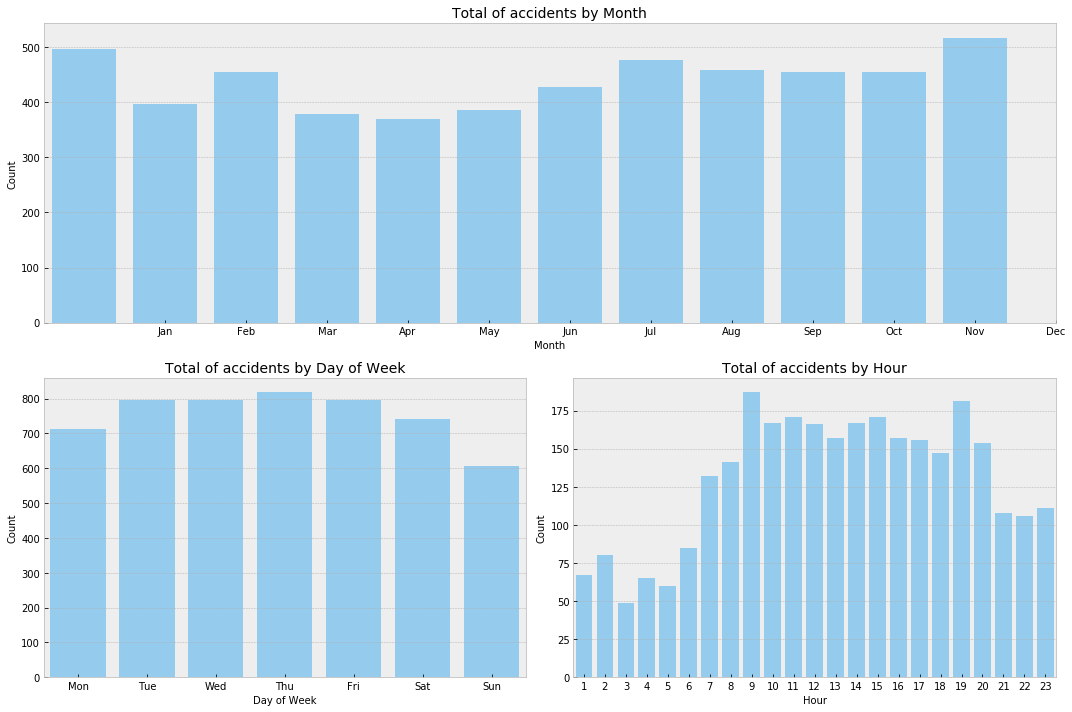

In [17]:
import matplotlib.pylab as pl
import matplotlib.gridspec as gridspec

#Puts will specify the geometry of the grid that a subplot can be placed in.
gs = gridspec.GridSpec(2, 2) #Here, 2 lines and 2 columns
#Size of the figure
plt.figure(figsize=(15,10))
#Other stylesheet used to draw the graph
plt.style.use('seaborn-muted')

#THE FIRST FIGURE
#The first plot will take the whole first line space
ax = pl.subplot(gs[0, :])
sns.barplot(Data.groupby(Data.Time.dt.month)[['Date']].count().index, 'Date', data=Data.groupby(Data.Time.dt.month)[['Date']].count(), color='lightskyblue', linewidth=2)
plt.xticks(Data.groupby(Data.Time.dt.month)[['Date']].count().index, ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.xlabel('Month', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.title('Total of accidents by Month', loc='Center', fontsize=14)

#THE SECOND FIGURE
#The second plot will be at the second line and first column
ax = pl.subplot(gs[1, 0]) 
sns.barplot(Data.groupby(Data.Time.dt.weekday)[['Date']].count().index, 'Date', data=Data.groupby(Data.Time.dt.weekday)[['Date']].count(), color='lightskyblue', linewidth=2)
plt.xticks(Data.groupby(Data.Time.dt.weekday)[['Date']].count().index, ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.xlabel('Day of Week', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.title('Total of accidents by Day of Week', loc='Center', fontsize=14)

#THE THIRD FIGURE
#The third plot will be at the second line and second column
ax = pl.subplot(gs[1, 1])
sns.barplot(Data[Data.Time.dt.hour != 0].groupby(Data.Time.dt.hour)[['Date']].count().index, 'Date', data=Data[Data.Time.dt.hour != 0].groupby(Data.Time.dt.hour)[['Date']].count(),color ='lightskyblue', linewidth=2)
plt.xlabel('Hour', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.title('Total of accidents by Hour', loc='Center', fontsize=14)

#"tight_layout()" automatically adjust subplot parameters to give specified padding
plt.tight_layout()
plt.show()

### Balance between Military and Passenger flights

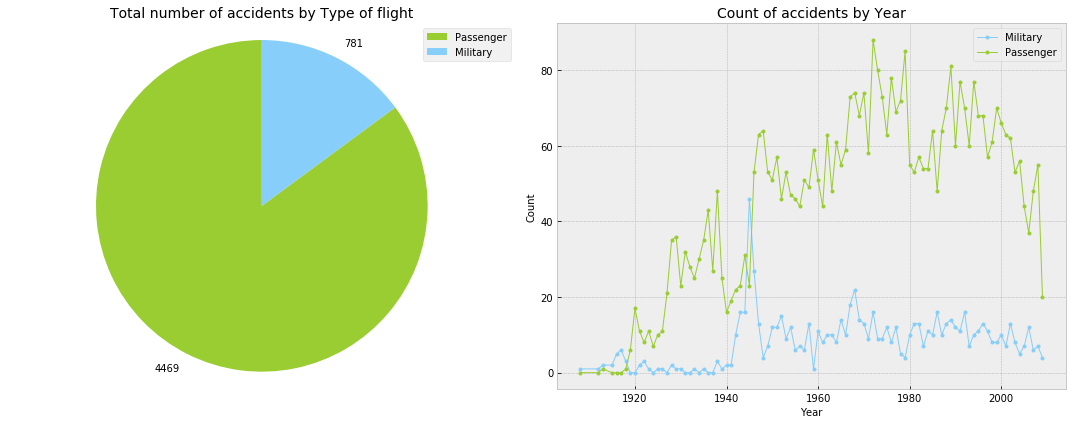

In [18]:
#We copy the original dataframe to a new one
Temp = Data.copy()
#The following line will return a boolean table of "True" and "False" values
Temp['isMilitary'] = Temp.Operator.str.contains('MILITARY')
#We count the occurence of "True" values in the table
Temp = Temp.groupby('isMilitary')[['isMilitary']].count()
Temp.index = ['Passenger', 'Military']

Temp2 = Data.copy()
Temp2['Military'] = Temp2.Operator.str.contains('MILITARY')
Temp2['Passenger'] = Temp2.Military == False
Temp2 = Temp2.loc[:, ['Time', 'Military', 'Passenger']]
Temp2 = Temp2.groupby(Temp2.Time.dt.year)[['Military', 'Passenger']].aggregate(np.count_nonzero)

colors = ['yellowgreen', 'lightskyblue']
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
patches, texts = plt.pie(Temp.isMilitary, colors=colors, labels=Temp.isMilitary, startangle=90)
plt.legend(patches, Temp.index, loc="best", fontsize=10)
plt.axis('equal')
plt.title('Total number of accidents by Type of flight', loc='Center', fontsize=14)

plt.subplot(1, 2, 2)
plt.plot(Temp2.index, 'Military', data=Temp2, color='lightskyblue', marker = ".", linewidth=1)
plt.plot(Temp2.index, 'Passenger', data=Temp2, color='yellowgreen', marker = ".", linewidth=1)
plt.legend(fontsize=10)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.title('Count of accidents by Year', loc='Center', fontsize=14)
plt.tight_layout()
plt.show()

### Total number of Fatalities

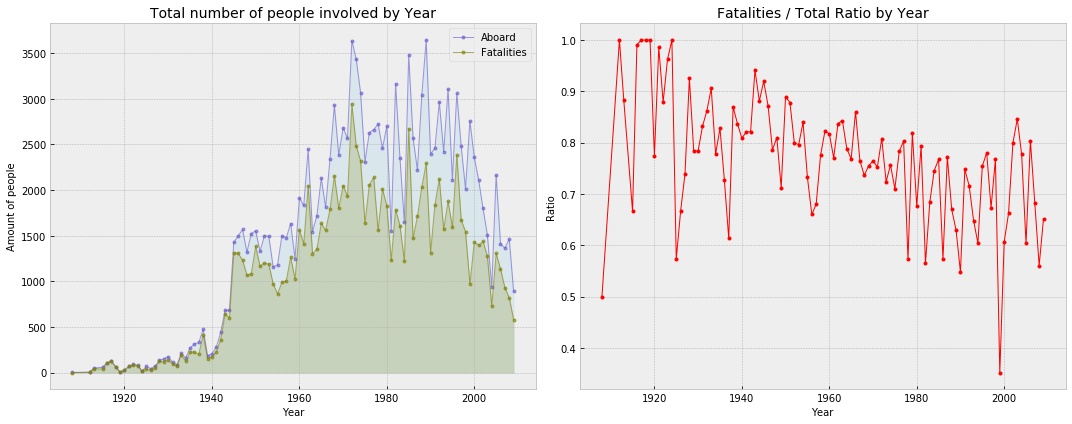

In [19]:
Fatalities = Data.groupby(Data.Time.dt.year).sum()
Fatalities['Proportion'] = Fatalities['Fatalities'] / Fatalities['Aboard']

plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
plt.fill_between(Fatalities.index, 'Aboard', data=Fatalities, color="skyblue", alpha=0.2)
plt.plot(Fatalities.index, 'Aboard', data=Fatalities, marker = ".", color="Slateblue", alpha=0.6, linewidth=1)
plt.fill_between(Fatalities.index, 'Fatalities', data=Fatalities, color="olive", alpha=0.2)
plt.plot(Fatalities.index, 'Fatalities', data=Fatalities, color="olive", marker = ".", alpha=0.6, linewidth=1)
plt.legend(fontsize=10)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Amount of people', fontsize=10)
plt.title('Total number of people involved by Year', loc='Center', fontsize=14)

plt.subplot(1, 2, 2)
plt.plot(Fatalities.index, 'Proportion', data=Fatalities, marker = ".", color = 'red', linewidth=1)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Ratio', fontsize=10)
plt.title('Fatalities / Total Ratio by Year', loc='Center', fontsize=14)
plt.tight_layout()
plt.show()

## Gross data analysis

In [20]:
Data_clean.head(10)

,Time,Count
0,1908,1
1,1909,0
2,1910,0
3,1911,0
4,1912,1
5,1913,3
6,1914,0
7,1915,2
8,1916,5
9,1917,6


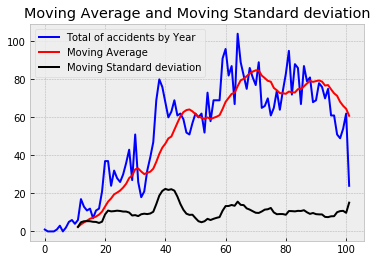

In [21]:
rolling_mean = Data_clean['Count'].rolling(window = 12).mean()
rolling_std = Data_clean['Count'].rolling(window = 12).std()

plt.plot(Data_clean['Count'], color = 'blue', label = 'Total of accidents by Year')
plt.plot(rolling_mean, color = 'red', label = 'Moving Average')
plt.plot(rolling_std, color = 'black', label = 'Moving Standard deviation')
plt.legend(loc = 'best')
plt.title('Moving Average and Moving Standard deviation')
plt.show()

### Remove Seasonality from the Time Series

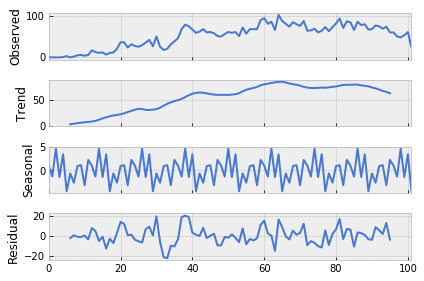

In [22]:
import statsmodels
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

result = seasonal_decompose(Data_clean['Count'], freq=12)
result.plot()
plt.show()

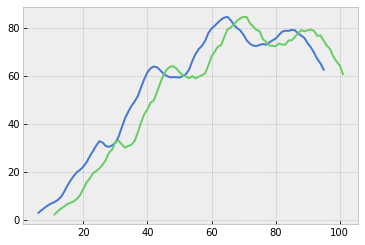

In [23]:
plt.plot(result.trend)
plt.plot(rolling_mean)
plt.show()

### Dickey-Fuller

In [24]:
# Perform Dickey-Fuller test
results = adfuller(Data_clean['Count'])
print('ADF Statistic: %f' % results[0])
print('p-value: %f' % results[1])
print('Critical Values:')
for key, value in results[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.918595
p-value: 0.323365
Critical Values:
	1%: -3.498
	5%: -2.891
	10%: -2.582


### Taking the difference and get the residual

In [25]:
Data_clean['diff'] = Data_clean['Count'].diff()
Data_clean.head(5)

,Time,Count,diff
0,1908,1,NaN
1,1909,0,-1.0
2,1910,0,0.0
3,1911,0,0.0
4,1912,1,1.0


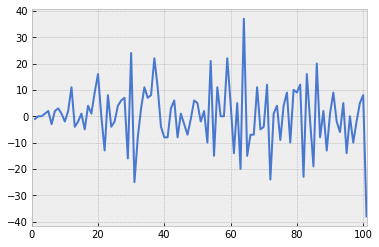

In [26]:
Data_clean['diff'].plot.line()

### Dickey-Fuller for the residual

In [27]:
# Perform Dickey-Fuller test
results_diff = adfuller(Data_clean['diff'][1:])
print('ADF Statistic: %f' % results_diff[0])
print('p-value: %f' % results_diff[1])
print('Critical Values:')
for key, value in results_diff[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -13.893338
p-value: 0.000000
Critical Values:
	1%: -3.498
	5%: -2.891
	10%: -2.582


The residual is stationary !

### ACF / PACF

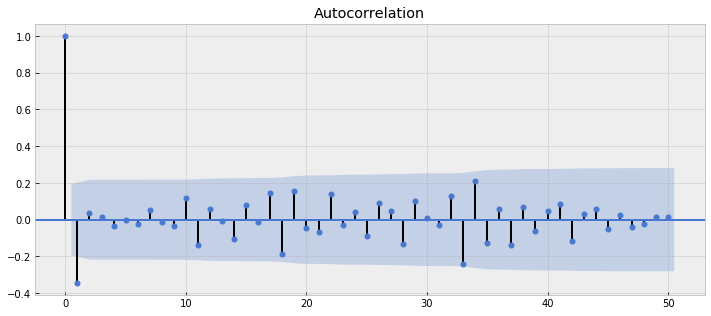

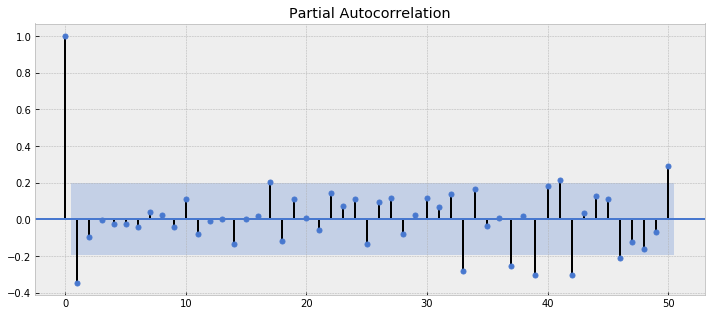

In [28]:
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

#For the MA (of AR-I-MA)
fig,ax = plt.subplots(figsize=(12,5))
plot_acf(Data_clean['diff'][1:], lags=50, ax=ax)
pyplot.show()

#For the AR (of AR-I-MA)
fig,ax = plt.subplots(figsize=(12,5))
plot_pacf(Data_clean['diff'][1:], lags=50, ax=ax)
pyplot.show()

### Split - train and test sets

#### With TimeSeriesSplit

In [29]:
from sklearn.model_selection import TimeSeriesSplit
import warnings
warnings.filterwarnings('ignore')

tscv = TimeSeriesSplit()
print(tscv)

TimeSeriesSplit(max_train_size=None, n_splits=3)


In [30]:
for train_index, test_index in tscv.split(Data_clean['diff'][1:]):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = Data_clean['diff'][1:][train_index], Data_clean['diff'][1:][test_index]
    y_train, y_test = Data_clean['diff'][1:][train_index], Data_clean['diff'][1:][test_index]

TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25] TEST: [26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50] TEST: [51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74
 75]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75] TEST: [ 76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93
  94  95  96  97  98  99 100]


#### Other split (manually)

In [31]:
train_size = int(len(Data_clean['diff'][1:]) * 0.66)
train, test = Data_clean['diff'][1:][0:train_size], Data_clean['diff'][1:][train_size:len(Data_clean['diff'][1:])]
print('Observations: %d' % (len(Data_clean['diff'][1:])))
print('Training Observations: %d' % (len(train)))
print('Testing Observations: %d' % (len(test)))

Observations: 101
Training Observations: 66
Testing Observations: 35


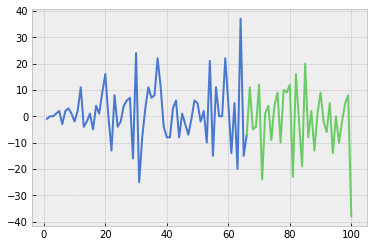

In [32]:
pyplot.plot(train)
pyplot.plot([None for i in train] + [x for x in test])
pyplot.show()

### ARIMA model training

In [33]:
from statsmodels.tsa.arima_model import ARIMA

#Fit model
model = ARIMA(Data_clean['diff'][1:], order=(1,0,1)) #Order = AR,I,MA so 1,0,1 (see above)
model_fit = model.fit(disp=0)
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:                   diff   No. Observations:                  101
Model:                     ARMA(1, 1)   Log Likelihood                -379.372
Method:                       css-mle   S.D. of innovations             10.343
Date:                Wed, 01 Apr 2020   AIC                            766.743
Time:                        09:49:06   BIC                            777.204
Sample:                             0   HQIC                           770.978
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3677      0.644      0.571      0.569      -0.895       1.630
ar.L1.diff    -0.1363      0.263     -0.517      0.606      -0.653       0.380
ma.L1.diff    -0.2937      0.254     -1.157      0.2

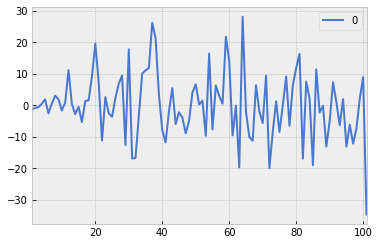

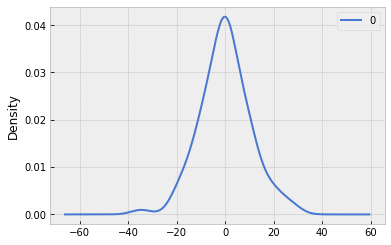

                0
count  101.000000
mean    -0.008005
std     10.394516
min    -34.715729
25%     -6.197766
50%      0.192287
75%      6.303621
max     28.046795


In [34]:
#Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

### Prediction

In [35]:
#One-step out-of sample forecast
forecast = model_fit.forecast()[0]
print('Forecast: %f' % forecast)

Forecast: 15.791987


In [36]:
start_index = len(Data_clean['diff'][1:])
end_index = len(Data_clean['diff'][1:])
forecast2 = model_fit.predict(start=start_index, end=end_index)
print('Forecast2: %f' % forecast2)

Forecast2: 15.791987


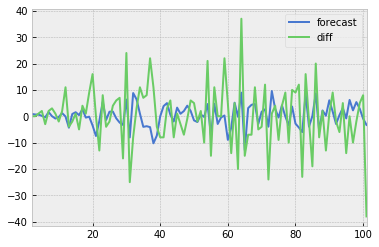

In [37]:
# Actual vs Fitted
model_fit.plot_predict(dynamic=False) #When you set dynamic=False the in-sample lagged values are used for prediction. 
plt.show()

### Evaluation

In [ ]:
diff = Data_clean['diff'][1:]
# Accuracy metrics
def forecast_accuracy(forecast, diff):
    mape = np.mean(np.abs(forecast - diff)/np.abs(diff))  # MAPE
    me = np.mean(forecast - diff)                       # ME
    mae = np.mean(np.abs(forecast - diff))    # MAE
    mpe = np.mean((forecast - diff)/diff)   # MPE
    rmse = np.mean((forecast - diff)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, diff)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              diff[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              diff[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'acf1':acf1, 
            'corr':corr, 'minmax':minmax})

forecast_accuracy(Data_clean, test.values)

### Walk-forward

In [39]:
diff = Data_clean['diff'][1:]
n_train = 10 #From 1 to 100
n_records = len(diff)
for i in range(n_train, n_records):
    train, test = diff[0:i], diff[i:i+1]
    print('train=%d, test=%d' % (len(train), len(test)))

train=10, test=1
train=11, test=1
train=12, test=1
train=13, test=1
train=14, test=1
train=15, test=1
train=16, test=1
train=17, test=1
train=18, test=1
train=19, test=1
train=20, test=1
train=21, test=1
train=22, test=1
train=23, test=1
train=24, test=1
train=25, test=1
train=26, test=1
train=27, test=1
train=28, test=1
train=29, test=1
train=30, test=1
train=31, test=1
train=32, test=1
train=33, test=1
train=34, test=1
train=35, test=1
train=36, test=1
train=37, test=1
train=38, test=1
train=39, test=1
train=40, test=1
train=41, test=1
train=42, test=1
train=43, test=1
train=44, test=1
train=45, test=1
train=46, test=1
train=47, test=1
train=48, test=1
train=49, test=1
train=50, test=1
train=51, test=1
train=52, test=1
train=53, test=1
train=54, test=1
train=55, test=1
train=56, test=1
train=57, test=1
train=58, test=1
train=59, test=1
train=60, test=1
train=61, test=1
train=62, test=1
train=63, test=1
train=64, test=1
train=65, test=1
train=66, test=1
train=67, test=1
train=68, test

# RNN

In [121]:
from pandas import DataFrame
from pandas import Series
from pandas import concat
from pandas import read_csv
from pandas import datetime
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, SimpleRNN, GRU
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from math import sqrt
import matplotlib
import numpy
from numpy import concatenate

In [144]:
#Frame a sequence as a supervised learning problem
def timeseries_to_supervised(data, lag=1):
    df = DataFrame(data)
    columns = [df.shift(i) for i in range(1, lag+1)]
    columns.append(df)
    df = concat(columns, axis=1)
    return df

In [145]:
#Create a differenced series
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return Series(diff)

In [146]:
#Invert differenced value
def inverse_difference(history, yhat, interval=1):
    return yhat + history[-interval]

In [147]:
#Scale train and test data to [-1, 1]
def scale(train, test):
    # fit scaler
    scaler = MinMaxScaler(feature_range=(-1, 1))
    scaler = scaler.fit(train)
    # transform train
    train = train.reshape(train.shape[0], train.shape[1])
    train_scaled = scaler.transform(train)
    # transform test
    test = test.reshape(test.shape[0], test.shape[1])
    test_scaled = scaler.transform(test)
    return scaler, train_scaled, test_scaled

In [148]:
#Inverse scaling for a forecasted value
def invert_scale(scaler, X, yhat):
    new_row = [x for x in X] + [yhat]
    array = numpy.array(new_row)
    array = array.reshape(1, len(array))
    inverted = scaler.inverse_transform(array)
    return inverted[0, -1]

In [149]:
#Fit a RNN to training data
def fit_rnn(train, batch_size, nb_epoch, neurons, timesteps):
    X, y = train[:, 0:-1], train[:, -1]
    X = X.reshape(X.shape[0], timesteps, 1)
    model = Sequential()
    model.add(SimpleRNN(50, input_shape=(X.shape[1], X.shape[2])))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    for i in range(nb_epoch):
        model.fit(X, y, epochs=10, batch_size=batch_size)
        model.reset_states()
    return model

In [150]:
#Make a one-step forecast
def forecast_rnn(model, batch_size, X):
    X = X.reshape(1, len(X), 1)
    yhat = model.predict(X, batch_size=batch_size)
    return yhat[0,0]

In [97]:
#Run a repeated experiment
def experiment(repeats, series, timesteps):
    # transform data to be stationary
    raw_values = series.values
    diff_values = difference(raw_values, 1)
    # transform data to be supervised learning
    supervised = timeseries_to_supervised(diff_values, timesteps)
    supervised_values = supervised.values[timesteps:,:]
    # split data into train and test-sets
    train, test = supervised_values[0:-12, :], supervised_values[-12:, :]
    # transform the scale of the data
    scaler, train_scaled, test_scaled = scale(train, test)
    # run experiment
    error_scores = list()
    for r in range(repeats):
        # fit the base model
        rnn_model = fit_rnn(train_scaled, 1, 50, 1, timesteps)
        # forecast test dataset
        predictions = list()
        for i in range(len(test_scaled)):
            # predict
            X, y = test_scaled[i, 0:-1], test_scaled[i, -1]
            yhat = forecast_rnn(rnn_model, 1, X)
            # invert scaling
            yhat = invert_scale(scaler, X, yhat)
            # invert differencing
            yhat = inverse_difference(raw_values, yhat, len(test_scaled)+1-i)
            # store forecast
            predictions.append(yhat)
        # report performance
        rmse = sqrt(mean_squared_error(raw_values[-12:], predictions))
        print('%d) Test RMSE: %.3f' % (r+1, rmse))
        error_scores.append(rmse)
    return error_scores

In [98]:
#Execute the experiment
def run():
    # load dataset
    series = read_csv('Airplanes_crashes_clean_dataset.csv', header=0, parse_dates=[0], index_col=0, squeeze=True)
    # experiment
    repeats = 10
    results = DataFrame()
    # run experiment
    timesteps = 1
    results['results'] = experiment(repeats, series, timesteps)
    # summarize results
    print(results.describe())
    # save results
    results.to_csv('experiment_timesteps_rnn_1.csv', index=False)

In [99]:
#Entry point
run()

Epoch 1/10
88/88 [==============================] - 3s 31ms/step - loss: 0.1425
Epoch 2/10
88/88 [==============================] - 1s 12ms/step - loss: 0.1165
Epoch 3/10
88/88 [==============================] - 1s 12ms/step - loss: 0.1101: 0s - loss
Epoch 4/10
88/88 [==============================] - 1s 12ms/step - loss: 0.1091
Epoch 5/10
88/88 [==============================] - 1s 14ms/step - loss: 0.1098ETA
Epoch 6/10
88/88 [==============================] - 1s 14ms/step - loss: 0.1101
Epoch 7/10
88/88 [==============================] - 1s 14ms/step - loss: 0.1097
Epoch 8/10
88/88 [==============================] - 1s 12ms/step - loss: 0.1105
Epoch 9/10
88/88 [==============================] - 1s 15ms/step - loss: 0.1110
Epoch 10/10
88/88 [==============================] - 1s 14ms/step - loss: 0.1113
Epoch 1/10
88/88 [==============================] - 1s 12ms/step - loss: 0.1104
Epoch 2/10
88/88 [==============================] - 1s 12ms/step - loss: 0.1086
Epoch 3/10
88/88 [=======

88/88 [==============================] - 1s 11ms/step - loss: 0.1100
Epoch 3/10
88/88 [==============================] - 1s 11ms/step - loss: 0.1118
Epoch 4/10
88/88 [==============================] - 1s 11ms/step - loss: 0.1097
Epoch 5/10
88/88 [==============================] - 1s 11ms/step - loss: 0.1119
Epoch 6/10
88/88 [==============================] - 1s 11ms/step - loss: 0.1090
Epoch 7/10
88/88 [==============================] - 1s 12ms/step - loss: 0.1095
Epoch 8/10
88/88 [==============================] - 1s 14ms/step - loss: 0.1097
Epoch 9/10
88/88 [==============================] - 2s 20ms/step - loss: 0.1097
Epoch 10/10
88/88 [==============================] - 1s 13ms/step - loss: 0.1115
Epoch 1/10
88/88 [==============================] - 1s 14ms/step - loss: 0.1102
Epoch 2/10
88/88 [==============================] - 1s 14ms/step - loss: 0.1112
Epoch 3/10
88/88 [==============================] - 1s 11ms/step - loss: 0.1088
Epoch 4/10
88/88 [==============================] 

88/88 [==============================] - 1s 11ms/step - loss: 0.1098
Epoch 5/10
88/88 [==============================] - 1s 11ms/step - loss: 0.1093
Epoch 6/10
88/88 [==============================] - 1s 11ms/step - loss: 0.1103
Epoch 7/10
88/88 [==============================] - 1s 11ms/step - loss: 0.1078
Epoch 8/10
88/88 [==============================] - 1s 13ms/step - loss: 0.1086
Epoch 9/10
88/88 [==============================] - 1s 11ms/step - loss: 0.1103
Epoch 10/10
88/88 [==============================] - 1s 11ms/step - loss: 0.1085
Epoch 1/10
88/88 [==============================] - 1s 12ms/step - loss: 0.1089
Epoch 2/10
88/88 [==============================] - 1s 11ms/step - loss: 0.1082
Epoch 3/10
88/88 [==============================] - 1s 12ms/step - loss: 0.1087
Epoch 4/10
88/88 [==============================] - 1s 12ms/step - loss: 0.1091
Epoch 5/10
88/88 [==============================] - 1s 12ms/step - loss: 0.1086
Epoch 6/10
88/88 [==============================] 

88/88 [==============================] - 1s 17ms/step - loss: 0.1085
Epoch 6/10
88/88 [==============================] - 1s 15ms/step - loss: 0.1088
Epoch 7/10
88/88 [==============================] - 1s 12ms/step - loss: 0.1084
Epoch 8/10
88/88 [==============================] - 1s 12ms/step - loss: 0.1079
Epoch 9/10
88/88 [==============================] - 1s 13ms/step - loss: 0.1084
Epoch 10/10
88/88 [==============================] - 1s 13ms/step - loss: 0.1082
Epoch 1/10
88/88 [==============================] - 1s 12ms/step - loss: 0.1092
Epoch 2/10
88/88 [==============================] - 1s 13ms/step - loss: 0.1092
Epoch 3/10
88/88 [==============================] - 1s 12ms/step - loss: 0.1085
Epoch 4/10
88/88 [==============================] - 1s 15ms/step - loss: 0.1088
Epoch 5/10
88/88 [==============================] - 1s 13ms/step - loss: 0.1086
Epoch 6/10
88/88 [==============================] - 1s 13ms/step - loss: 0.1089
Epoch 7/10
88/88 [==============================] 

KeyboardInterrupt: 

# LSTM

In [171]:
#Frame a sequence as a supervised learning problem
def timeseries_to_supervised(data, lag=1):
    df = DataFrame(data)
    columns = [df.shift(i) for i in range(1, lag+1)]
    columns.append(df)
    df = concat(columns, axis=1)
    return df

In [172]:
#Create a differenced series
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return Series(diff)

In [173]:
#Invert differenced value
def inverse_difference(history, yhat, interval=1):
    return yhat + history[-interval]

In [174]:
#Scale train and test data to [-1, 1]
def scale(train, test):
    # fit scaler
    scaler = MinMaxScaler(feature_range=(-1, 1))
    scaler = scaler.fit(train)
    # transform train
    train = train.reshape(train.shape[0], train.shape[1])
    train_scaled = scaler.transform(train)
    # transform test
    test = test.reshape(test.shape[0], test.shape[1])
    test_scaled = scaler.transform(test)
    return scaler, train_scaled, test_scaled

In [175]:
#Inverse scaling for a forecasted value
def invert_scale(scaler, X, yhat):
    new_row = [x for x in X] + [yhat]
    array = numpy.array(new_row)
    array = array.reshape(1, len(array))
    inverted = scaler.inverse_transform(array)
    return inverted[0, -1]

In [176]:
#Fit an LSTM network to training data
def fit_lstm(train, batch_size, nb_epoch, neurons, timesteps):
    X, y = train[:, 0:-1], train[:, -1]
    X = X.reshape(X.shape[0], timesteps, 1)
    model = Sequential()
    model.add(LSTM(neurons, batch_input_shape=(batch_size, X.shape[1], X.shape[2]), stateful=True))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    for i in range(nb_epoch):
        model.fit(X, y, epochs=1, batch_size=batch_size, verbose=0, shuffle=False)
        model.reset_states()
    return model

In [177]:
#Make a one-step forecast
def forecast_lstm(model, batch_size, X):
    X = X.reshape(1, len(X), 1)
    yhat = model.predict(X, batch_size=batch_size)
    return yhat[0,0]

In [178]:
#Run a repeated experiment
def experiment(repeats, series, timesteps):
    # transform data to be stationary
    raw_values = series.values
    diff_values = difference(raw_values, 1)
    # transform data to be supervised learning
    supervised = timeseries_to_supervised(diff_values, timesteps)
    supervised_values = supervised.values[timesteps:,:]
    # split data into train and test-sets
    train, test = supervised_values[0:-12, :], supervised_values[-12:, :]
    # transform the scale of the data
    scaler, train_scaled, test_scaled = scale(train, test)
    # run experiment
    error_scores = list()
    for r in range(repeats):
        # fit the base model
        lstm_model = fit_lstm(train_scaled, 1, 500, 1, timesteps)
        # forecast test dataset
        predictions = list()
        for i in range(len(test_scaled)):
            # predict
            X, y = test_scaled[i, 0:-1], test_scaled[i, -1]
            yhat = forecast_lstm(lstm_model, 1, X)
            # invert scaling
            yhat = invert_scale(scaler, X, yhat)
            # invert differencing
            yhat = inverse_difference(raw_values, yhat, len(test_scaled)+1-i)
            # store forecast
            predictions.append(yhat)
        # report performance
        rmse = sqrt(mean_squared_error(raw_values[-12:], predictions))
        print('%d) Test RMSE: %.3f' % (r+1, rmse))
        error_scores.append(rmse)
    return error_scores

In [182]:
#Execute the experiment
def run():
    # load dataset
    series = read_csv('Airplanes_crashes_clean_dataset.csv', header=0, parse_dates=[0], index_col=0, squeeze=True)
    # experiment
    repeats = 10
    results = DataFrame()
    # run experiment
    timesteps = 1
    results['results'] = experiment(repeats, series, timesteps)
    # summarize results
    print(results.describe())
    # save results
    results.to_csv('experiment_timesteps_1.csv', index=False)

In [183]:
#Entry point
run()

1) Test RMSE: 12.681
2) Test RMSE: 12.789
3) Test RMSE: 12.844
4) Test RMSE: 12.770
5) Test RMSE: 14.439
6) Test RMSE: 12.696
7) Test RMSE: 13.714
8) Test RMSE: 14.024
9) Test RMSE: 12.724
10) Test RMSE: 13.494
         results
count  10.000000
mean   13.217499
std     0.649213
min    12.680520
25%    12.735387
50%    12.816532
75%    13.658936
max    14.439417


# GRU

In [161]:
# frame a sequence as a supervised learning problem
def timeseries_to_supervised(data, lag=1):
    df = DataFrame(data)
    columns = [df.shift(i) for i in range(1, lag+1)]
    columns.append(df)
    df = concat(columns, axis=1)
    return df

In [162]:
# create a differenced series
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return Series(diff)

In [163]:
# invert differenced value
def inverse_difference(history, yhat, interval=1):
    return yhat + history[-interval]

In [164]:
#Scale train and test data to [-1, 1]
def scale(train, test):
    # fit scaler
    scaler = MinMaxScaler(feature_range=(-1, 1))
    scaler = scaler.fit(train)
    # transform train
    train = train.reshape(train.shape[0], train.shape[1])
    train_scaled = scaler.transform(train)
    # transform test
    test = test.reshape(test.shape[0], test.shape[1])
    test_scaled = scaler.transform(test)
    return scaler, train_scaled, test_scaled

In [165]:
#Inverse scaling for a forecasted value
def invert_scale(scaler, X, yhat):
    new_row = [x for x in X] + [yhat]
    array = numpy.array(new_row)
    array = array.reshape(1, len(array))
    inverted = scaler.inverse_transform(array)
    return inverted[0, -1]

In [166]:
#Fit an GRU network to training data
def fit_gru(train, batch_size, nb_epoch, neurons, timesteps):
    X, y = train[:, 0:-1], train[:, -1]
    X = X.reshape(X.shape[0], timesteps, 1)
    model = Sequential()
    model.add(GRU(neurons, batch_input_shape=(batch_size, X.shape[1], X.shape[2])))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    for i in range(nb_epoch):
        model.fit(X, y, epochs=1, batch_size=batch_size, verbose=0, shuffle=False)
        model.reset_states()
    return model

In [167]:
#Make a one-step forecast
def forecast_gru(model, batch_size, X):
    X = X.reshape(1, len(X), 1)
    yhat = model.predict(X, batch_size=batch_size)
    return yhat[0,0]

In [168]:
#Run a repeated experiment
def experiment(repeats, series, timesteps):
    # transform data to be stationary
    raw_values = series.values
    diff_values = difference(raw_values, 1)
    # transform data to be supervised learning
    supervised = timeseries_to_supervised(diff_values, timesteps)
    supervised_values = supervised.values[timesteps:,:]
    # split data into train and test-sets
    train, test = supervised_values[0:-12, :], supervised_values[-12:, :]
    # transform the scale of the data
    scaler, train_scaled, test_scaled = scale(train, test)
    # run experiment
    error_scores = list()
    for r in range(repeats):
        # fit the base model
        gru_model = fit_gru(train_scaled, 1, 500, 1, timesteps)
        # forecast test dataset
        predictions = list()
        for i in range(len(test_scaled)):
            # predict
            X, y = test_scaled[i, 0:-1], test_scaled[i, -1]
            yhat = forecast_gru(gru_model, 1, X)
            # invert scaling
            yhat = invert_scale(scaler, X, yhat)
            # invert differencing
            yhat = inverse_difference(raw_values, yhat, len(test_scaled)+1-i)
            # store forecast
            predictions.append(yhat)
        # report performance
        rmse = sqrt(mean_squared_error(raw_values[-12:], predictions))
        print('%d) Test RMSE: %.3f' % (r+1, rmse))
        error_scores.append(rmse)
    return error_scores

In [169]:
#Execute the experiment
def run():
    # load dataset
    series = read_csv('Airplanes_crashes_clean_dataset.csv', header=0, parse_dates=[0], index_col=0, squeeze=True)
    # experiment
    repeats = 10
    results = DataFrame()
    # run experiment
    timesteps = 1
    results['results'] = experiment(repeats, series, timesteps)
    # summarize results
    print(results.describe())
    # save results
    results.to_csv('experiment_timesteps_gru_1.csv', index=False)

In [115]:
#Entry point
run()

WARNING - From C:\Users\utilisateur\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


1) Test RMSE: 12.655
2) Test RMSE: 12.660
3) Test RMSE: 12.643
4) Test RMSE: 12.655
5) Test RMSE: 12.665
6) Test RMSE: 12.669
7) Test RMSE: 12.662
8) Test RMSE: 12.642
9) Test RMSE: 12.660
10) Test RMSE: 12.667
         results
count  10.000000
mean   12.657792
std     0.009383
min    12.641929
25%    12.654720
50%    12.659991
75%    12.664233
max    12.669227
